# Turn the data into Anndata format for further analysis

In [1]:
#Importing the relevant libraries for doing the analysis (there are probably still too many that you do not need)
import pandas as pd
from pyFlowSOM import map_data_to_nodes, som
import seaborn as sns 
import numpy as np
import scanpy as sc
import squidpy as sq
import os
import gc
import random
from matplotlib import rcParams
import matplotlib.pyplot as plt
from pathlib import Path
from skimage.io  import imread, imsave
import skimage.io
import anndata as ad
import seaborn as sns 
from scipy import stats
import warnings
import shutil
import math
import openpyxl


/opt/anaconda3/envs/pre-processing/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/opt/anaconda3/envs/pre-processing/lib/python3.9/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [2]:
# Setting up the handling with scanpy

# This line sets the verbosity level of the Scanpy library. In this case, it sets it to the highest level (3), which includes errors, warnings, info, and hints
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3            

# This line prints a header for the log messages, indicating that the log messages are from Scanpy
sc.logging.print_header()

# This line temporarily suppresses the display of warning messages. 
# It sets a filter to ignore any warnings that might occur during the execution of the code.
warnings.filterwarnings('ignore')

# This line sets the default parameters for the figures generated by Scanpy
# It specifies the DPI (dots per inch) of the figures to be 80 and sets the face color of the figures to white.
sc.settings.set_figure_params(dpi=80, facecolor='white')

/opt/anaconda3/envs/pre-processing/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/anaconda3/envs/pre-processing/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/anaconda3/envs/pre-processing/lib/python3.9/site-packages/umap/dist

scanpy==1.9.4 anndata==0.9.2 umap==0.5.3 numpy==1.23.4 scipy==1.9.1 pandas==2.1.0 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.6 pynndescent==0.5.10


/opt/anaconda3/envs/pre-processing/lib/python3.9/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [3]:
#set up the directory for saving the plots of this notebook
preprocessing_python_dir = '/Volumes/VERBATIM HD 1/Hamburg Project/preprocessing_figures/flowsom/'

In [21]:
# Read the cell size normalized table
df = pd.read_csv('/Volumes/VERBATIM HD 1/Hamburg Project/preprocessing_figures/cell_table_with_annotation_TG/cell_table_with_annotation_1.csv', index_col=0)

In [22]:
df

,SMA,CA9,nuclei,CD98,CytC,CD4,MSH2,FoxP3,MCT1,PDL1,...,perimeter,convex_area,area,axis_major_length,axis_minor_length,label,fov,highest_value_column,highest_value_column_2,highest_value_column_3
0,0.000134,0.021289,0.046148,0.006393,0.015713,0.008352,0.024734,0.023453,0.000193,0.009023,...,58.384776,237.0,219.0,21.380209,13.571676,1,A1a,PanCK,PanCK,PanCK
1,0.002969,0.014578,0.034238,0.008831,0.106513,0.001745,0.063474,0.001185,0.002774,0.004173,...,62.041631,241.0,227.0,23.904973,12.765919,2,A1a,CD7,CD7,CD7
2,0.000012,0.113299,0.064198,0.034138,0.011429,0.000073,0.066563,0.000000,0.001506,0.009498,...,52.485281,186.0,179.0,19.813871,11.987551,3,A1a,CD7,CD7,CD7
3,0.000004,0.128277,0.097153,0.040913,0.030368,0.000812,0.016016,0.001458,0.005280,0.022267,...,54.727922,185.0,173.0,21.773657,11.016341,4,A1a,PanCK,PanCK,PanCK
4,0.000126,0.107682,0.054147,0.070130,0.098551,0.002679,0.081037,0.001234,0.020924,0.004454,...,107.219300,742.0,647.0,35.806907,24.028635,5,A1a,PanCK,PanCK,PanCK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579942,0.000000,0.025945,0.044181,0.021980,0.034234,0.041525,0.004055,0.009135,0.007513,0.094103,...,55.798990,225.0,215.0,20.467027,13.838134,1341,E4e,PanCK,PanCK,PanCK
579943,0.000000,0.052626,0.187155,0.222263,0.000000,0.026241,0.000000,0.003578,0.026086,0.083621,...,49.313708,171.0,168.0,20.011559,10.984429,1342,E4e,CD45,CD14,CD14
579944,0.000000,0.063988,0.164008,0.131201,0.082124,0.007325,0.002103,0.011567,0.010024,0.013886,...,48.177670,151.0,146.0,19.110780,10.364355,1343,E4e,CD45,CD68,CD68
579945,0.000000,0.037612,0.188549,0.035632,0.035699,0.096411,0.041807,0.016846,0.029209,0.117594,...,64.142136,243.0,236.0,28.365967,10.893396,1344,E4e,PanCK,PanCK,PanCK


In [23]:
# Getting the names of the columns in order to define the relevant channels
df.columns

Index(['SMA', 'CA9', 'nuclei', 'CD98', 'CytC', 'CD4', 'MSH2', 'FoxP3', 'MCT1',
       'PDL1', 'CD31', 'PD1', 'ASCT2', 'CD7', 'LDH', 'CD163', 'STING1', 'DCN',
       'CD68', 'GS', 'CD8', 'CD3e', 'GLS', 'MPO', 'ATP5A', 'CS', 'CD20',
       'PKM2', 'GLUT1', 'HLADRa', 'CD14', 'CD45', 'PanCK', 'MSH6', 'ARG1',
       'CPT1A', 'Vimentin', 'Ki67', 'membrane', 'centroid-0', 'centroid-1',
       'eccentricity', 'perimeter', 'convex_area', 'area', 'axis_major_length',
       'axis_minor_length', 'label', 'fov', 'highest_value_column',
       'highest_value_column_2', 'highest_value_column_3'],
      dtype='object')

In [24]:
# Define channels and background list to be removed
channels = ['SMA', 'CA9', 'nuclei', 'CD98', 'CytC', 'CD4', 'MSH2', 'FoxP3', 'MCT1',
       'PDL1', 'CD31', 'PD1', 'ASCT2', 'CD7', 'LDH', 'CD163', 'STING1', 'DCN',
       'CD68', 'GS', 'CD8', 'CD3e', 'GLS', 'MPO', 'ATP5A', 'CS', 'CD20',
       'PKM2', 'GLUT1', 'HLADRa', 'CD14', 'CD45', 'PanCK', 'MSH6', 'ARG1',
       'CPT1A', 'Vimentin', 'Ki67', 'membrane']

metabolic_channels= ['CD98', 'CytC', 'MCT1','ASCT2','LDH', 'GS', 'GLS', 'ATP5A', 'CS',
       'PKM2', 'GLUT1',  'ARG1', 'CPT1A'] 

other_channels= ['PD1', 'Ki67', 'STING1','PDL1', 'MSH2', 'MSH6', 'CA9']

lineage_channels= ['SMA','CD4','CD31','CD7', 'CD163', 'DCN',
       'CD68','CD8', 'CD3e', 'MPO', 'CD20', 'HLADRa', 'CD14', 'CD45', 'PanCK', 'Vimentin', 'FoxP3']

morpho= ['centroid-0', 'centroid-1',
       'eccentricity', 'perimeter', 'convex_area', 'area', 'axis_major_length',
       'axis_minor_length']

lineage_channels_modified= ['SMA','CD4','CD31','CD7', 'CD163',
       'CD68','CD8', 'CD3e', 'MPO', 'CD20', 'HLADRa', 'CD14', 'CD45', 'PanCK']

In [25]:
# Display the statistics of the  channels
df[lineage_channels_modified].describe()

,SMA,CD4,CD31,CD7,CD163,CD68,CD8,CD3e,MPO,CD20,HLADRa,CD14,CD45,PanCK
count,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000
mean,0.087196,0.112146,0.070893,0.048121,0.038589,0.053833,0.025442,0.061396,0.029993,0.018456,0.056820,0.120943,0.112052,0.163651
std,0.179152,0.153851,0.127283,0.112511,0.108133,0.118012,0.091685,0.137201,0.104183,0.076313,0.106240,0.155565,0.172723,0.178943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.015623,0.008810,0.006479,0.000816,0.003967,0.000000,0.007203,0.000940,0.000858,0.012646,0.030877,0.014942,0.027227
50%,0.000295,0.055137,0.026925,0.014208,0.006237,0.013330,0.002709,0.018211,0.002520,0.004393,0.026422,0.059225,0.028534,0.097821
75%,0.068720,0.139553,0.069539,0.031892,0.022577,0.040695,0.014676,0.039735,0.006176,0.012549,0.051257,0.135757,0.128169,0.246063
max,1.282786,2.112522,1.427654,1.740951,1.736134,1.481444,1.535366,1.610580,1.449134,1.468564,1.913428,1.611962,1.368006,1.463111


In [26]:
# Decide what channels you want to use to do the clustering, e.g. lineage_channels, metabolic_channels
df_channels_only = df[lineage_channels_modified].copy()
df_channels_only.describe()


,SMA,CD4,CD31,CD7,CD163,CD68,CD8,CD3e,MPO,CD20,HLADRa,CD14,CD45,PanCK
count,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000,579947.000000
mean,0.087196,0.112146,0.070893,0.048121,0.038589,0.053833,0.025442,0.061396,0.029993,0.018456,0.056820,0.120943,0.112052,0.163651
std,0.179152,0.153851,0.127283,0.112511,0.108133,0.118012,0.091685,0.137201,0.104183,0.076313,0.106240,0.155565,0.172723,0.178943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.015623,0.008810,0.006479,0.000816,0.003967,0.000000,0.007203,0.000940,0.000858,0.012646,0.030877,0.014942,0.027227
50%,0.000295,0.055137,0.026925,0.014208,0.006237,0.013330,0.002709,0.018211,0.002520,0.004393,0.026422,0.059225,0.028534,0.097821
75%,0.068720,0.139553,0.069539,0.031892,0.022577,0.040695,0.014676,0.039735,0.006176,0.012549,0.051257,0.135757,0.128169,0.246063
max,1.282786,2.112522,1.427654,1.740951,1.736134,1.481444,1.535366,1.610580,1.449134,1.468564,1.913428,1.611962,1.368006,1.463111


# Run PyFlowsome

In [27]:
#Basic usage - Here you do not need to change anything

#First step to do pyflowsome
example_som_input_arr = df_channels_only.to_numpy()

#train the SOM
node_output = som(example_som_input_arr, xdim=10, ydim=10, rlen=10)

#use trained SOM to assign clusters to each observation in your data
clusters, dists = map_data_to_nodes(node_output, example_som_input_arr)

In [28]:
# To put the data back into dataframes - Here you do not need to change anything

eno = pd.DataFrame(data=node_output, columns=df_channels_only.columns)
eco = pd.DataFrame(data=clusters, columns=["cluster"])

In [29]:
# To export to csv - Rename the files as you want to 
eno.to_csv(os.path.join(preprocessing_python_dir, 'CRC_node_lineage_channels.csv'), index=False)
eco.to_csv(os.path.join(preprocessing_python_dir, 'CRC_clusters_lineage_channels.csv'), index=False)

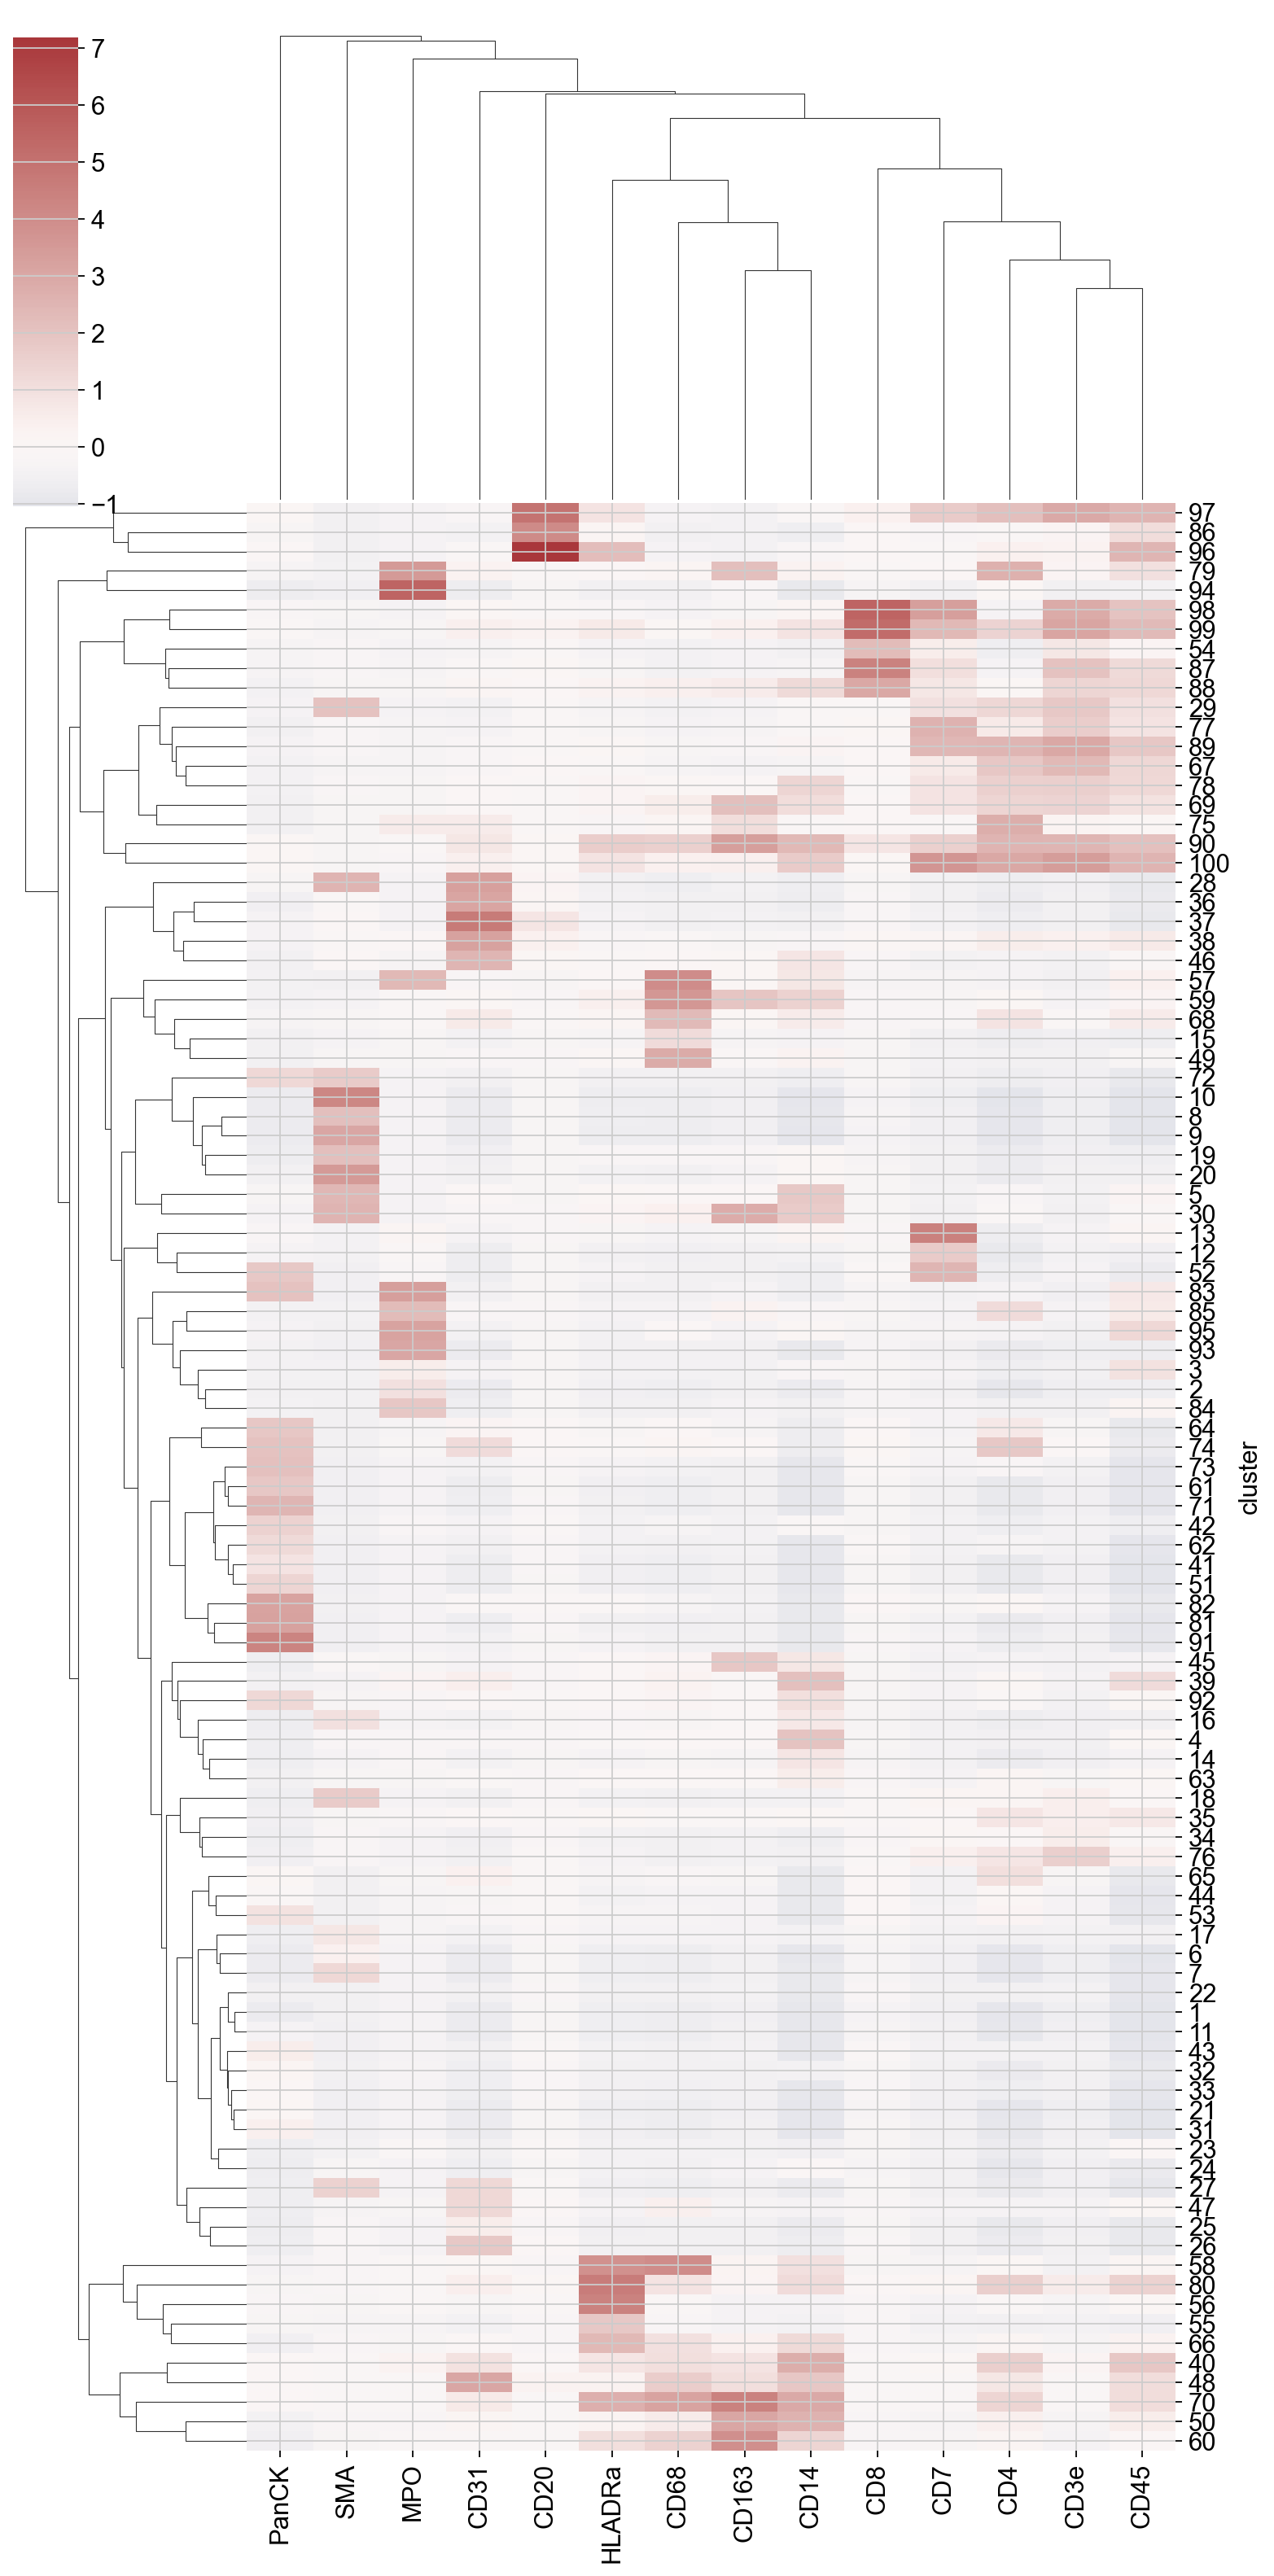

In [30]:
#To plot the output as a heatmap - Rename the file as you want to 

#Append results to the input data
df_channels_only['cluster'] = clusters

#Find mean of each cluster
df_channels_only_mean = df_channels_only.groupby(['cluster']).mean()

# Set the size of the heatmap figure (adjust the height as needed)
heatmap_height = len(df_channels_only_mean) * 0.2  # You can adjust the multiplier as needed
heatmap_width = 10  # Width of the heatmap figure

#Make heatmap
sns_plot = sns.clustermap(df_channels_only_mean, z_score=1, cmap="vlag", center=0, yticklabels=True, xticklabels=True, figsize=(heatmap_width, heatmap_height))

# Save the plot to a file
save_path = os.path.join(preprocessing_python_dir, 'pyflowsome_heatmap_lineage_channels.png')
plt.savefig(save_path, dpi=300, format='png')

# Display the figure
plt.show()

In [31]:
# Convert z-scores from the heatmap into a dataframe
z_scores = sns_plot.data2d
z_scores_df = pd.DataFrame(z_scores)


In [32]:
# Save the table with the z scores and the cluster names as a csv file - Rename the file
z_scores_df
z_scores_df.to_csv(os.path.join(preprocessing_python_dir, 'zscore_lineage_channels.csv'), index=True)

In [33]:
# Now you want to create a dataframe that contains the means of the channels in each cluster and not the z-score
df_channels_only_mean = df_channels_only.groupby(['cluster']).mean()

In [34]:
# Here is the code to add the cluster number

cluster_order = sns_plot.dendrogram_row.reordered_ind
cluster_order = [idx + 1 for idx in cluster_order]

# Print the order of the clusters
print("Cluster Order:", cluster_order)

Cluster Order: [97, 86, 96, 79, 94, 98, 99, 54, 87, 88, 29, 77, 89, 67, 78, 69, 75, 90, 100, 28, 36, 37, 38, 46, 57, 59, 68, 15, 49, 72, 10, 8, 9, 19, 20, 5, 30, 13, 12, 52, 83, 85, 95, 93, 3, 2, 84, 64, 74, 73, 61, 71, 42, 62, 41, 51, 82, 81, 91, 45, 39, 92, 16, 4, 14, 63, 18, 35, 34, 76, 65, 44, 53, 17, 6, 7, 22, 1, 11, 43, 32, 33, 21, 31, 23, 24, 27, 47, 25, 26, 58, 80, 56, 55, 66, 40, 48, 70, 50, 60]


In [35]:
# Display the table 
df_channels_only_mean

,SMA,CD4,CD31,CD7,CD163,CD68,CD8,CD3e,MPO,CD20,HLADRa,CD14,CD45,PanCK
cluster,,,,,,,,,,,,,,
1,0.013201,0.012929,0.011135,0.013273,0.004146,0.009302,0.002352,0.009059,0.008650,0.002787,0.016300,0.050505,0.020404,0.023760
2,0.005977,0.034490,0.013713,0.023405,0.009798,0.020718,0.002990,0.011981,0.229870,0.001790,0.025191,0.073779,0.104670,0.064194
3,0.023439,0.091283,0.073096,0.036748,0.022227,0.047652,0.007909,0.026834,0.162342,0.005039,0.042536,0.183095,0.463597,0.077705
4,0.058584,0.115494,0.094555,0.030429,0.090263,0.104624,0.007659,0.029533,0.031148,0.007746,0.086551,0.620390,0.265435,0.043825
5,0.536294,0.172455,0.121736,0.030565,0.094231,0.111370,0.010510,0.038756,0.010817,0.006987,0.128088,0.586795,0.303550,0.103921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.007954,0.303138,0.108711,0.084672,0.026470,0.057379,0.052041,0.202549,0.005461,0.976703,0.444518,0.186808,0.807254,0.159841
97,0.011903,0.680643,0.095655,0.394024,0.026233,0.048515,0.111357,0.737450,0.004775,0.691091,0.242578,0.191620,0.823552,0.174455
98,0.047433,0.142079,0.148405,0.666366,0.047254,0.056938,0.847447,0.719857,0.009598,0.027135,0.080685,0.252177,0.698097,0.121137


In [36]:
# Save the table - Rename the file as you like to 
df_channels_only_mean.to_csv(os.path.join(preprocessing_python_dir, 'cluster_name_lineage_channels.csv'), index=True)

In [37]:
# Read the table so that we are now working with this table 
df = pd.read_csv(os.path.join(preprocessing_python_dir, 'cluster_name_lineage_channels.csv'))

In [38]:
# Display the table - you see that the order of the cluster is not yet the one from the heatmap
df

,cluster,SMA,CD4,CD31,CD7,CD163,CD68,CD8,CD3e,MPO,CD20,HLADRa,CD14,CD45,PanCK
0,1,0.013201,0.012929,0.011135,0.013273,0.004146,0.009302,0.002352,0.009059,0.008650,0.002787,0.016300,0.050505,0.020404,0.023760
1,2,0.005977,0.034490,0.013713,0.023405,0.009798,0.020718,0.002990,0.011981,0.229870,0.001790,0.025191,0.073779,0.104670,0.064194
2,3,0.023439,0.091283,0.073096,0.036748,0.022227,0.047652,0.007909,0.026834,0.162342,0.005039,0.042536,0.183095,0.463597,0.077705
3,4,0.058584,0.115494,0.094555,0.030429,0.090263,0.104624,0.007659,0.029533,0.031148,0.007746,0.086551,0.620390,0.265435,0.043825
4,5,0.536294,0.172455,0.121736,0.030565,0.094231,0.111370,0.010510,0.038756,0.010817,0.006987,0.128088,0.586795,0.303550,0.103921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.007954,0.303138,0.108711,0.084672,0.026470,0.057379,0.052041,0.202549,0.005461,0.976703,0.444518,0.186808,0.807254,0.159841
96,97,0.011903,0.680643,0.095655,0.394024,0.026233,0.048515,0.111357,0.737450,0.004775,0.691091,0.242578,0.191620,0.823552,0.174455
97,98,0.047433,0.142079,0.148405,0.666366,0.047254,0.056938,0.847447,0.719857,0.009598,0.027135,0.080685,0.252177,0.698097,0.121137
98,99,0.040646,0.526891,0.208743,0.508628,0.160296,0.135454,0.802533,0.772519,0.020524,0.079349,0.211055,0.406511,0.778648,0.130212


In [39]:
# Create a new dataframe with rows ordered by the 'cluster_order' - Now, 'df_ordered' contains the DataFrame with rows reordered based on the 'cluster_order'.
df_ordered = df.set_index('cluster').loc[cluster_order].reset_index()

In [40]:
# Display the table
df_ordered

,cluster,SMA,CD4,CD31,CD7,CD163,CD68,CD8,CD3e,MPO,CD20,HLADRa,CD14,CD45,PanCK
0,97,0.011903,0.680643,0.095655,0.394024,0.026233,0.048515,0.111357,0.737450,0.004775,0.691091,0.242578,0.191620,0.823552,0.174455
1,86,0.011867,0.189186,0.066122,0.064062,0.021288,0.033923,0.049725,0.173898,0.005233,0.572771,0.131371,0.110499,0.506959,0.102627
2,96,0.007954,0.303138,0.108711,0.084672,0.026470,0.057379,0.052041,0.202549,0.005461,0.976703,0.444518,0.186808,0.807254,0.159841
3,79,0.022565,0.775344,0.192612,0.094337,0.466710,0.143583,0.037541,0.182335,0.645263,0.017074,0.104027,0.284348,0.476379,0.099091
4,94,0.000794,0.236059,0.022575,0.014835,0.055080,0.035630,0.004422,0.027137,0.971362,0.004711,0.038212,0.059410,0.141221,0.039120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,40,0.074630,0.551179,0.290838,0.117290,0.247781,0.293975,0.032642,0.173338,0.123194,0.041389,0.234500,0.769469,0.668055,0.165107
96,48,0.082390,0.385828,0.638049,0.074242,0.281451,0.384997,0.033113,0.106998,0.046034,0.086161,0.159217,0.604122,0.505906,0.162874
97,70,0.069632,0.504460,0.248570,0.082529,0.844015,0.634133,0.025784,0.096035,0.046208,0.027813,0.525931,0.805754,0.505882,0.153081
98,50,0.057966,0.314727,0.159510,0.051169,0.618039,0.211996,0.019102,0.064294,0.028874,0.015884,0.153893,0.739870,0.377788,0.078644


In [41]:
# Save the table 
df_ordered.to_csv(os.path.join(preprocessing_python_dir, 'cluster_name_lineage_channels_ordered.csv'), index=True)

In [42]:
# Now load an excel file where you have annotated each cluster so that the cluster number will re replaced by the annotated cluster name 
replacement_df= pd.read_csv(os.path.join(preprocessing_python_dir, 'replacement_df_lineages_filtered.csv'), delimiter=';')

In [43]:
# Display the table 
replacement_df

,Actual,Flow
0,97,CD4_Tcell_pot_flow
1,86,B_cell_flow
2,96,B_cell_flow
3,79,Neutrophil_pot_flow
4,94,Neutrophil_flow
...,...,...
95,40,CD14_pot_flow
96,48,Unclear_flow
97,70,CD163_CD68_flow
98,50,CD163_CD14_flow


In [44]:
eco= pd.read_csv(os.path.join(preprocessing_python_dir, 'CRC_clusters_lineage_channels.csv'), delimiter=';')

In [45]:
eco

,cluster
0,21
1,1
2,1
3,11
4,21
...,...
579942,61
579943,92
579944,15
579945,43


In [46]:
# Merge the DataFrames on the 'Actual' column
merged_df = eco.merge(replacement_df, left_on='cluster', right_on='Actual', how='left')

# Replace the 'Fruit' column with the 'Replacement' column where applicable
merged_df['cluster'] = merged_df['Flow'].fillna(merged_df['cluster'])

# Drop the 'Actual' and 'Replacement' columns if needed
merged_df.drop(['Actual', 'Flow'], axis=1, inplace=True)

# Display the updated DataFrame
print(merged_df)

#save the file - rename it as you want to 
merged_df.to_csv(os.path.join(preprocessing_python_dir, 'Celltype_filtered.csv'), index=False)



                     cluster
0       Cancer_cell_pot_flow
1               Unclear_flow
2               Unclear_flow
3               Unclear_flow
4       Cancer_cell_pot_flow
...                      ...
579942      Cancer_cell_flow
579943      Cancer_CD14_flow
579944             CD68_flow
579945  Cancer_cell_pot_flow
579946             CD68_flow

[579947 rows x 1 columns]


In [47]:
merged_df

,cluster
0,Cancer_cell_pot_flow
1,Unclear_flow
2,Unclear_flow
3,Unclear_flow
4,Cancer_cell_pot_flow
...,...
579942,Cancer_cell_flow
579943,Cancer_CD14_flow
579944,CD68_flow
579945,Cancer_cell_pot_flow


In [48]:
# Read the cell size normalized table
df_2= pd.read_csv('/Volumes/VERBATIM HD 1/Hamburg Project/preprocessing_figures/cell_table_with_annotation_TG/cell_table_with_annotation_1.csv', index_col=0)

In [49]:
df_2

,SMA,CA9,nuclei,CD98,CytC,CD4,MSH2,FoxP3,MCT1,PDL1,...,perimeter,convex_area,area,axis_major_length,axis_minor_length,label,fov,highest_value_column,highest_value_column_2,highest_value_column_3
0,0.000134,0.021289,0.046148,0.006393,0.015713,0.008352,0.024734,0.023453,0.000193,0.009023,...,58.384776,237.0,219.0,21.380209,13.571676,1,A1a,PanCK,PanCK,PanCK
1,0.002969,0.014578,0.034238,0.008831,0.106513,0.001745,0.063474,0.001185,0.002774,0.004173,...,62.041631,241.0,227.0,23.904973,12.765919,2,A1a,CD7,CD7,CD7
2,0.000012,0.113299,0.064198,0.034138,0.011429,0.000073,0.066563,0.000000,0.001506,0.009498,...,52.485281,186.0,179.0,19.813871,11.987551,3,A1a,CD7,CD7,CD7
3,0.000004,0.128277,0.097153,0.040913,0.030368,0.000812,0.016016,0.001458,0.005280,0.022267,...,54.727922,185.0,173.0,21.773657,11.016341,4,A1a,PanCK,PanCK,PanCK
4,0.000126,0.107682,0.054147,0.070130,0.098551,0.002679,0.081037,0.001234,0.020924,0.004454,...,107.219300,742.0,647.0,35.806907,24.028635,5,A1a,PanCK,PanCK,PanCK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579942,0.000000,0.025945,0.044181,0.021980,0.034234,0.041525,0.004055,0.009135,0.007513,0.094103,...,55.798990,225.0,215.0,20.467027,13.838134,1341,E4e,PanCK,PanCK,PanCK
579943,0.000000,0.052626,0.187155,0.222263,0.000000,0.026241,0.000000,0.003578,0.026086,0.083621,...,49.313708,171.0,168.0,20.011559,10.984429,1342,E4e,CD45,CD14,CD14
579944,0.000000,0.063988,0.164008,0.131201,0.082124,0.007325,0.002103,0.011567,0.010024,0.013886,...,48.177670,151.0,146.0,19.110780,10.364355,1343,E4e,CD45,CD68,CD68
579945,0.000000,0.037612,0.188549,0.035632,0.035699,0.096411,0.041807,0.016846,0.029209,0.117594,...,64.142136,243.0,236.0,28.365967,10.893396,1344,E4e,PanCK,PanCK,PanCK


In [50]:
df_2['cluster'] = merged_df['cluster']

In [51]:
df_2

,SMA,CA9,nuclei,CD98,CytC,CD4,MSH2,FoxP3,MCT1,PDL1,...,convex_area,area,axis_major_length,axis_minor_length,label,fov,highest_value_column,highest_value_column_2,highest_value_column_3,cluster
0,0.000134,0.021289,0.046148,0.006393,0.015713,0.008352,0.024734,0.023453,0.000193,0.009023,...,237.0,219.0,21.380209,13.571676,1,A1a,PanCK,PanCK,PanCK,Cancer_cell_pot_flow
1,0.002969,0.014578,0.034238,0.008831,0.106513,0.001745,0.063474,0.001185,0.002774,0.004173,...,241.0,227.0,23.904973,12.765919,2,A1a,CD7,CD7,CD7,Unclear_flow
2,0.000012,0.113299,0.064198,0.034138,0.011429,0.000073,0.066563,0.000000,0.001506,0.009498,...,186.0,179.0,19.813871,11.987551,3,A1a,CD7,CD7,CD7,Unclear_flow
3,0.000004,0.128277,0.097153,0.040913,0.030368,0.000812,0.016016,0.001458,0.005280,0.022267,...,185.0,173.0,21.773657,11.016341,4,A1a,PanCK,PanCK,PanCK,Unclear_flow
4,0.000126,0.107682,0.054147,0.070130,0.098551,0.002679,0.081037,0.001234,0.020924,0.004454,...,742.0,647.0,35.806907,24.028635,5,A1a,PanCK,PanCK,PanCK,Cancer_cell_pot_flow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579942,0.000000,0.025945,0.044181,0.021980,0.034234,0.041525,0.004055,0.009135,0.007513,0.094103,...,225.0,215.0,20.467027,13.838134,1341,E4e,PanCK,PanCK,PanCK,Cancer_cell_flow
579943,0.000000,0.052626,0.187155,0.222263,0.000000,0.026241,0.000000,0.003578,0.026086,0.083621,...,171.0,168.0,20.011559,10.984429,1342,E4e,CD45,CD14,CD14,Cancer_CD14_flow
579944,0.000000,0.063988,0.164008,0.131201,0.082124,0.007325,0.002103,0.011567,0.010024,0.013886,...,151.0,146.0,19.110780,10.364355,1343,E4e,CD45,CD68,CD68,CD68_flow
579945,0.000000,0.037612,0.188549,0.035632,0.035699,0.096411,0.041807,0.016846,0.029209,0.117594,...,243.0,236.0,28.365967,10.893396,1344,E4e,PanCK,PanCK,PanCK,Cancer_cell_pot_flow


In [72]:
#Saving the table
save_path = "/Volumes/VERBATIM HD 1/Hamburg Project/preprocessing_figures/cell_table_with_annotation_TG/cell_table_with_annotation_flow_added.csv"
df_2.to_csv(save_path, index=True)

In [53]:
# Assuming df_2 has columns "fov", "label", and "cluster"
selected_columns = df_2[["fov", "label", "cluster"]]

In [54]:
selected_columns

,fov,label,cluster
0,A1a,1,Cancer_cell_pot_flow
1,A1a,2,Unclear_flow
2,A1a,3,Unclear_flow
3,A1a,4,Unclear_flow
4,A1a,5,Cancer_cell_pot_flow
...,...,...,...
579942,E4e,1341,Cancer_cell_flow
579943,E4e,1342,Cancer_CD14_flow
579944,E4e,1343,CD68_flow
579945,E4e,1344,Cancer_cell_pot_flow


In [55]:
# Save the new DataFrame to a CSV file without a header
selected_columns.to_csv(os.path.join(preprocessing_python_dir, 'mantis_annotation_flow.csv'), header=False, index=False)


In [73]:
df = pd.read_csv('/Volumes/VERBATIM HD 1/Hamburg Project/preprocessing_figures/cell_table_with_annotation_TG/cell_table_with_annotation_flow_added.csv', index_col=0)

In [74]:
df

,SMA,CA9,nuclei,CD98,CytC,CD4,MSH2,FoxP3,MCT1,PDL1,...,convex_area,area,axis_major_length,axis_minor_length,label,fov,highest_value_column,highest_value_column_2,highest_value_column_3,cluster
0,0.000134,0.021289,0.046148,0.006393,0.015713,0.008352,0.024734,0.023453,0.000193,0.009023,...,237.0,219.0,21.380209,13.571676,1,A1a,PanCK,PanCK,PanCK,Cancer_cell_pot_flow
1,0.002969,0.014578,0.034238,0.008831,0.106513,0.001745,0.063474,0.001185,0.002774,0.004173,...,241.0,227.0,23.904973,12.765919,2,A1a,CD7,CD7,CD7,Unclear_flow
2,0.000012,0.113299,0.064198,0.034138,0.011429,0.000073,0.066563,0.000000,0.001506,0.009498,...,186.0,179.0,19.813871,11.987551,3,A1a,CD7,CD7,CD7,Unclear_flow
3,0.000004,0.128277,0.097153,0.040913,0.030368,0.000812,0.016016,0.001458,0.005280,0.022267,...,185.0,173.0,21.773657,11.016341,4,A1a,PanCK,PanCK,PanCK,Unclear_flow
4,0.000126,0.107682,0.054147,0.070130,0.098551,0.002679,0.081037,0.001234,0.020924,0.004454,...,742.0,647.0,35.806907,24.028635,5,A1a,PanCK,PanCK,PanCK,Cancer_cell_pot_flow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579942,0.000000,0.025945,0.044181,0.021980,0.034234,0.041525,0.004055,0.009135,0.007513,0.094103,...,225.0,215.0,20.467027,13.838134,1341,E4e,PanCK,PanCK,PanCK,Cancer_cell_flow
579943,0.000000,0.052626,0.187155,0.222263,0.000000,0.026241,0.000000,0.003578,0.026086,0.083621,...,171.0,168.0,20.011559,10.984429,1342,E4e,CD45,CD14,CD14,Cancer_CD14_flow
579944,0.000000,0.063988,0.164008,0.131201,0.082124,0.007325,0.002103,0.011567,0.010024,0.013886,...,151.0,146.0,19.110780,10.364355,1343,E4e,CD45,CD68,CD68,CD68_flow
579945,0.000000,0.037612,0.188549,0.035632,0.035699,0.096411,0.041807,0.016846,0.029209,0.117594,...,243.0,236.0,28.365967,10.893396,1344,E4e,PanCK,PanCK,PanCK,Cancer_cell_pot_flow


In [75]:
# Unique values in the column "highest_value_column_3"
unique_values_column_3 = df['highest_value_column_3'].unique()

# Unique values in the column "cluster"
unique_values_cluster = df['cluster'].unique()

print("Unique values in highest_value_column_3:", unique_values_column_3)
print("Unique values in cluster:", unique_values_cluster)


Unique values in highest_value_column_3: ['PanCK' 'CD7' 'CD68' 'MPO' 'CD14' 'CD31' 'CD8' 'CD4' 'SMA' 'CD163'
 'HLADRa' 'CD20']
Unique values in cluster: ['Cancer_cell_pot_flow' 'Unclear_flow' 'CD68_flow' 'CD7_NK_flow'
 'Neutrophil_pot_flow' 'Cancer_cell_flow' 'Neutrophil_flow' 'Immune_flow'
 'CD14_pot_flow' 'Endothelial_cell_flow' 'CD8_Tcell_flow' 'CAF_pot_flow'
 'CD163_flow' 'CD14_flow' 'SMA_CD14_flow' 'CD31_SMA_flow' 'CD4_Tcell_flow'
 'HLADR_flow' 'CAF_flow' 'CD68_HLADR_flow' 'Cancer_CD14_flow' 'CD7_flow'
 'CAF_cancer_flow' 'Cancer_cell_CD4_flow' 'CD163_CD14_flow'
 'CD4_Tcell_pot_flow' 'CD163_CD68_flow' 'B_cell_flow' 'CD8_Tcell_pot_flow'
 'SMA_CD163_flow' 'CD4_HLADR_flow' 'Neutrophil_CD68_flow'
 'Neutrophil_cancer_flow']


In [76]:
# Define a function to determine the cell_type_final
def determine_cell_type(row):
    if row['highest_value_column_3'] == 'PanCK' and row['cluster'] in ['Cancer_cell_flow', 'Cancer_cell_pot_flow','Unclear_flow', 'CAF_cancer_flow', 'Neutrophil_cancer_flow', 'Cancer_CD14_flow', 'Cancer_cell_CD4_flow', 'HLADR_flow']:
        return 'Cancer_cell'
    elif row['highest_value_column_3'] == 'CD31' and row['cluster']  in ['Endothelial_cell_flow', 'Unclear_flow', 'CD8_CD31_flow', 'CD31_SMA_flow']:
        return 'Endothelial_cell'
    elif row['highest_value_column_3'] == 'CD4' and row['cluster']  in ['CD4_Tcell_flow','CD4_Tcell_pot_flow', 'Unclear_flow', 'Immune_flow' , 'Cancer_cell_CD4_flow', 'CD8_CD4_flow', 'CD4_CD68_flow', 'CD7_flow', 'CD4_HLADR_flow']:
        return 'CD4_Tcell' 
    elif row['highest_value_column_3'] == 'MPO' and row['cluster']  in ['Neutrophil_flow', 'Neutrophil_pot_flow', 'Unclear_flow','Immune_flow', 'Neutrophil_cancer_flow', 'Neutrophil_CD68_flow', 'CD14_pot_flow']:
        return 'Neutrophil'  
    elif row['highest_value_column_3'] == 'SMA' and row['cluster']  in ['CAF_flow' ,'SMA_CD163_flow', 'Unclear_flow', 'CAF_cancer_flow', 'CAF_pot_flow', 'SMA_CD14_flow']:
        return 'CAF'
    elif row['highest_value_column_3'] == 'CD68' and row['cluster']  in ['Unclear_flow', 'Immune_flow', 'CD68_flow', 'CD163_CD68_flow', 'Neutrophil_CD68_flow', 'CD4_CD68_flow', 'CD14_pot_flow', 'CD14_flow' , 'CD68_HLADR_flow']:
        return 'CD68+_macrophage' 
    elif row['highest_value_column_3'] == 'CD163' and row['cluster']  in ['CD163_flow', 'Unclear_flow', 'Immune_flow','SMA_CD163_flow', 'CD163_CD14_flow', 'SMA_CD163_flow', 'CD163_CD68_flow', 'CD14_pot_flow', 'CD14_flow', 'CD68_flow']:
        return 'CD163+_macrophage'  
    elif row['highest_value_column_3'] == 'CD14' and row['cluster']  in ['CD14_flow','Unclear_flow', 'Immune_flow','CD14_pot_flow','SMA_CD14_flow', 'Cancer_CD14_flow']:
        return 'Monocyte'
    elif row['highest_value_column_3'] == 'HLADRa' and row['cluster']  in ['HLADR_flow', 'Unclear_flow', 'Immune_flow', 'CD68_HLADR_flow', 'CD4_HLADR_flow']:
        return 'APC' 
    elif row['highest_value_column_3'] == 'HLADRa' and row['cluster']  in ['B_cell_flow']:
        return 'B_cell'
    elif row['highest_value_column_3'] == 'CD20' and row['cluster']  in ['B_cell_flow']:
        return 'B_cell'
    elif row['highest_value_column_3'] == 'CD8' and row['cluster']  in ['CD8_Tcell_flow', 'Unclear_flow','Immune_flow', 'CD8_CD4_flow', 'CD8_Tcell_pot_flow', 'CD8_CD31_flow', 'CD7_flow']:
        return 'CD8_Tcell'
    elif row['highest_value_column_3'] == 'CD7' and row['cluster']  in ['CD7_flow', 'Unclear_flow','Immune_flow']:
        return 'Immune_cell' 
    elif row['highest_value_column_3'] == 'CD7' and row['cluster']  in ['CD4_Tcell_flow','CD4_Tcell_pot_flow']:
        return 'CD4_Tcell' 
    elif row['highest_value_column_3'] == 'CD7' and row['cluster']  in ['CD8_Tcell_pot_flow', 'CD8_Tcell_flow']:
        return 'CD8_Tcell' 
    elif row['highest_value_column_3'] == 'CD3e' and row['cluster']  in ['CD4_Tcell_flow','CD4_Tcell_pot_flow']:
        return 'CD4_Tcell' 
    elif row['highest_value_column_3'] == 'CD3e' and row['cluster']  in ['CD8_Tcell_pot_flow', 'CD8_Tcell_flow']:
        return 'CD8_Tcell' 
    elif row['highest_value_column_3'] == 'CD3e' and row['cluster']  in [ 'Unclear_flow','Immune_flow' ]:
        return 'Immune_cell'  
    elif row['highest_value_column_3'] == 'SMA' and row['cluster']  in ['Cancer_cell_flow', 'Cancer_cell_pot_flow', 'CAF_cancer_flow' ]:
        return 'Cancer_cell' 
    elif row['highest_value_column_3'] == 'CD7' and row['cluster']  in ['CD7_NK_flow']:
        return 'NK_cell' 
    else:
        return "Unclear"  # or any other default value you want

# Apply the function to create the new column
df['cell_type_final'] = df.apply(determine_cell_type, axis=1)


In [205]:
# Get unique values in the cell_type_final column
unique_values = df['cell_type_final'].unique()

# Create a dictionary to store counts for each unique value
counts = {}

# Count the number of rows for each unique value
for value in unique_values:
    counts[value] = (df['cell_type_final'] == value).sum()

# Sort the dictionary by counts in descending order
sorted_counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}

# Print the sorted counts
for value, count in sorted_counts.items():
    print("Number of rows with '{}' in the cell_type_final column: {}".format(value, count))


Number of rows with 'Cancer_cell' in the cell_type_final column: 276715
Number of rows with 'CAF' in the cell_type_final column: 102472
Number of rows with 'Endothelial_cell' in the cell_type_final column: 39726
Number of rows with 'Monocyte' in the cell_type_final column: 33084
Number of rows with 'Neutrophil' in the cell_type_final column: 27897
Number of rows with 'CD4_Tcell' in the cell_type_final column: 24434
Number of rows with 'CD68+_macrophage' in the cell_type_final column: 23464
Number of rows with 'CD163+_macrophage' in the cell_type_final column: 14281
Number of rows with 'CD8_Tcell' in the cell_type_final column: 11251
Number of rows with 'NK_cell' in the cell_type_final column: 8709
Number of rows with 'APC' in the cell_type_final column: 4230
Number of rows with 'B_cell' in the cell_type_final column: 4136
Number of rows with 'T_reg_cell' in the cell_type_final column: 3569
Number of rows with 'Unclear' in the cell_type_final column: 3468
Number of rows with 'Other_immu

In [79]:
# Create a pivot table
pivot_table = df.pivot_table(index='highest_value_column_3', columns='cluster', aggfunc='size', fill_value=0)
print(pivot_table)
# Save the pivot table as an Excel file
pivot_table.to_excel(os.path.join(preprocessing_python_dir, 'pivot_table.xlsx'), header=True, index=True)



cluster                 B_cell_flow  CAF_cancer_flow  CAF_flow  CAF_pot_flow  \
highest_value_column_3                                                         
CD14                             17                1         4           664   
CD163                             2                1        14           125   
CD20                           4086                0         0            14   
CD31                             17                1         0           103   
CD4                              69                0         0           609   
CD68                              8                0        27           146   
CD7                              17                0         1           363   
CD8                              31                2         2            73   
HLADRa                           50                0         1            82   
MPO                               1                0         2            64   
PanCK                             4     

In [80]:
# Create a subset of the DataFrame where 'cell_type_final' is 'None'
subset_df = df[df['cell_type_final'] == 'Unclear']

# Create a pivot table for the subset
pivot_table_subset = subset_df.pivot_table(index='highest_value_column_3', columns='cluster', aggfunc='size', fill_value=0)

# Save the pivot table as an Excel file
pivot_table_subset.to_excel(os.path.join(preprocessing_python_dir, 'pivot_table_unclear.xlsx'), header=True, index=True)


In [81]:
# Create a subset of the DataFrame where 'cell_type_final' is 'None'
subset_df = df[df['cell_type_final'] == 'Immune_cell']

# Create a pivot table for the subset
pivot_table_subset = subset_df.pivot_table(index='highest_value_column_3', columns='cluster', aggfunc='size', fill_value=0)

# Save the pivot table as an Excel file
pivot_table_subset.to_excel(os.path.join(preprocessing_python_dir, 'pivot_table_immune_cell.xlsx'), header=True, index=True)


In [189]:
# Replace the label "Cancer_cell_pot" with "Cancer_cell" in the "cell_type_final" column
df['cell_type_final'] = df['cell_type_final'].replace('CD8_Tcells', 'CD8_Tcell')

In [206]:
# Assuming df_2 has columns "fov", "label", and "cluster"
selected_columns = df[["fov", "label", "cell_type_final"]]

In [207]:
selected_columns

,fov,label,cell_type_final
0,A1a,1,Cancer_cell
1,A1a,2,NK_cell
2,A1a,3,NK_cell
3,A1a,4,Cancer_cell
4,A1a,5,Cancer_cell
...,...,...,...
579942,E4e,1341,Cancer_cell
579943,E4e,1342,Monocyte
579944,E4e,1343,CD68+_macrophage
579945,E4e,1344,Cancer_cell


In [208]:
# Save the new DataFrame to a CSV file without a header
selected_columns.to_csv(os.path.join(preprocessing_python_dir, 'annotation_final.csv'), header=False, index=False)

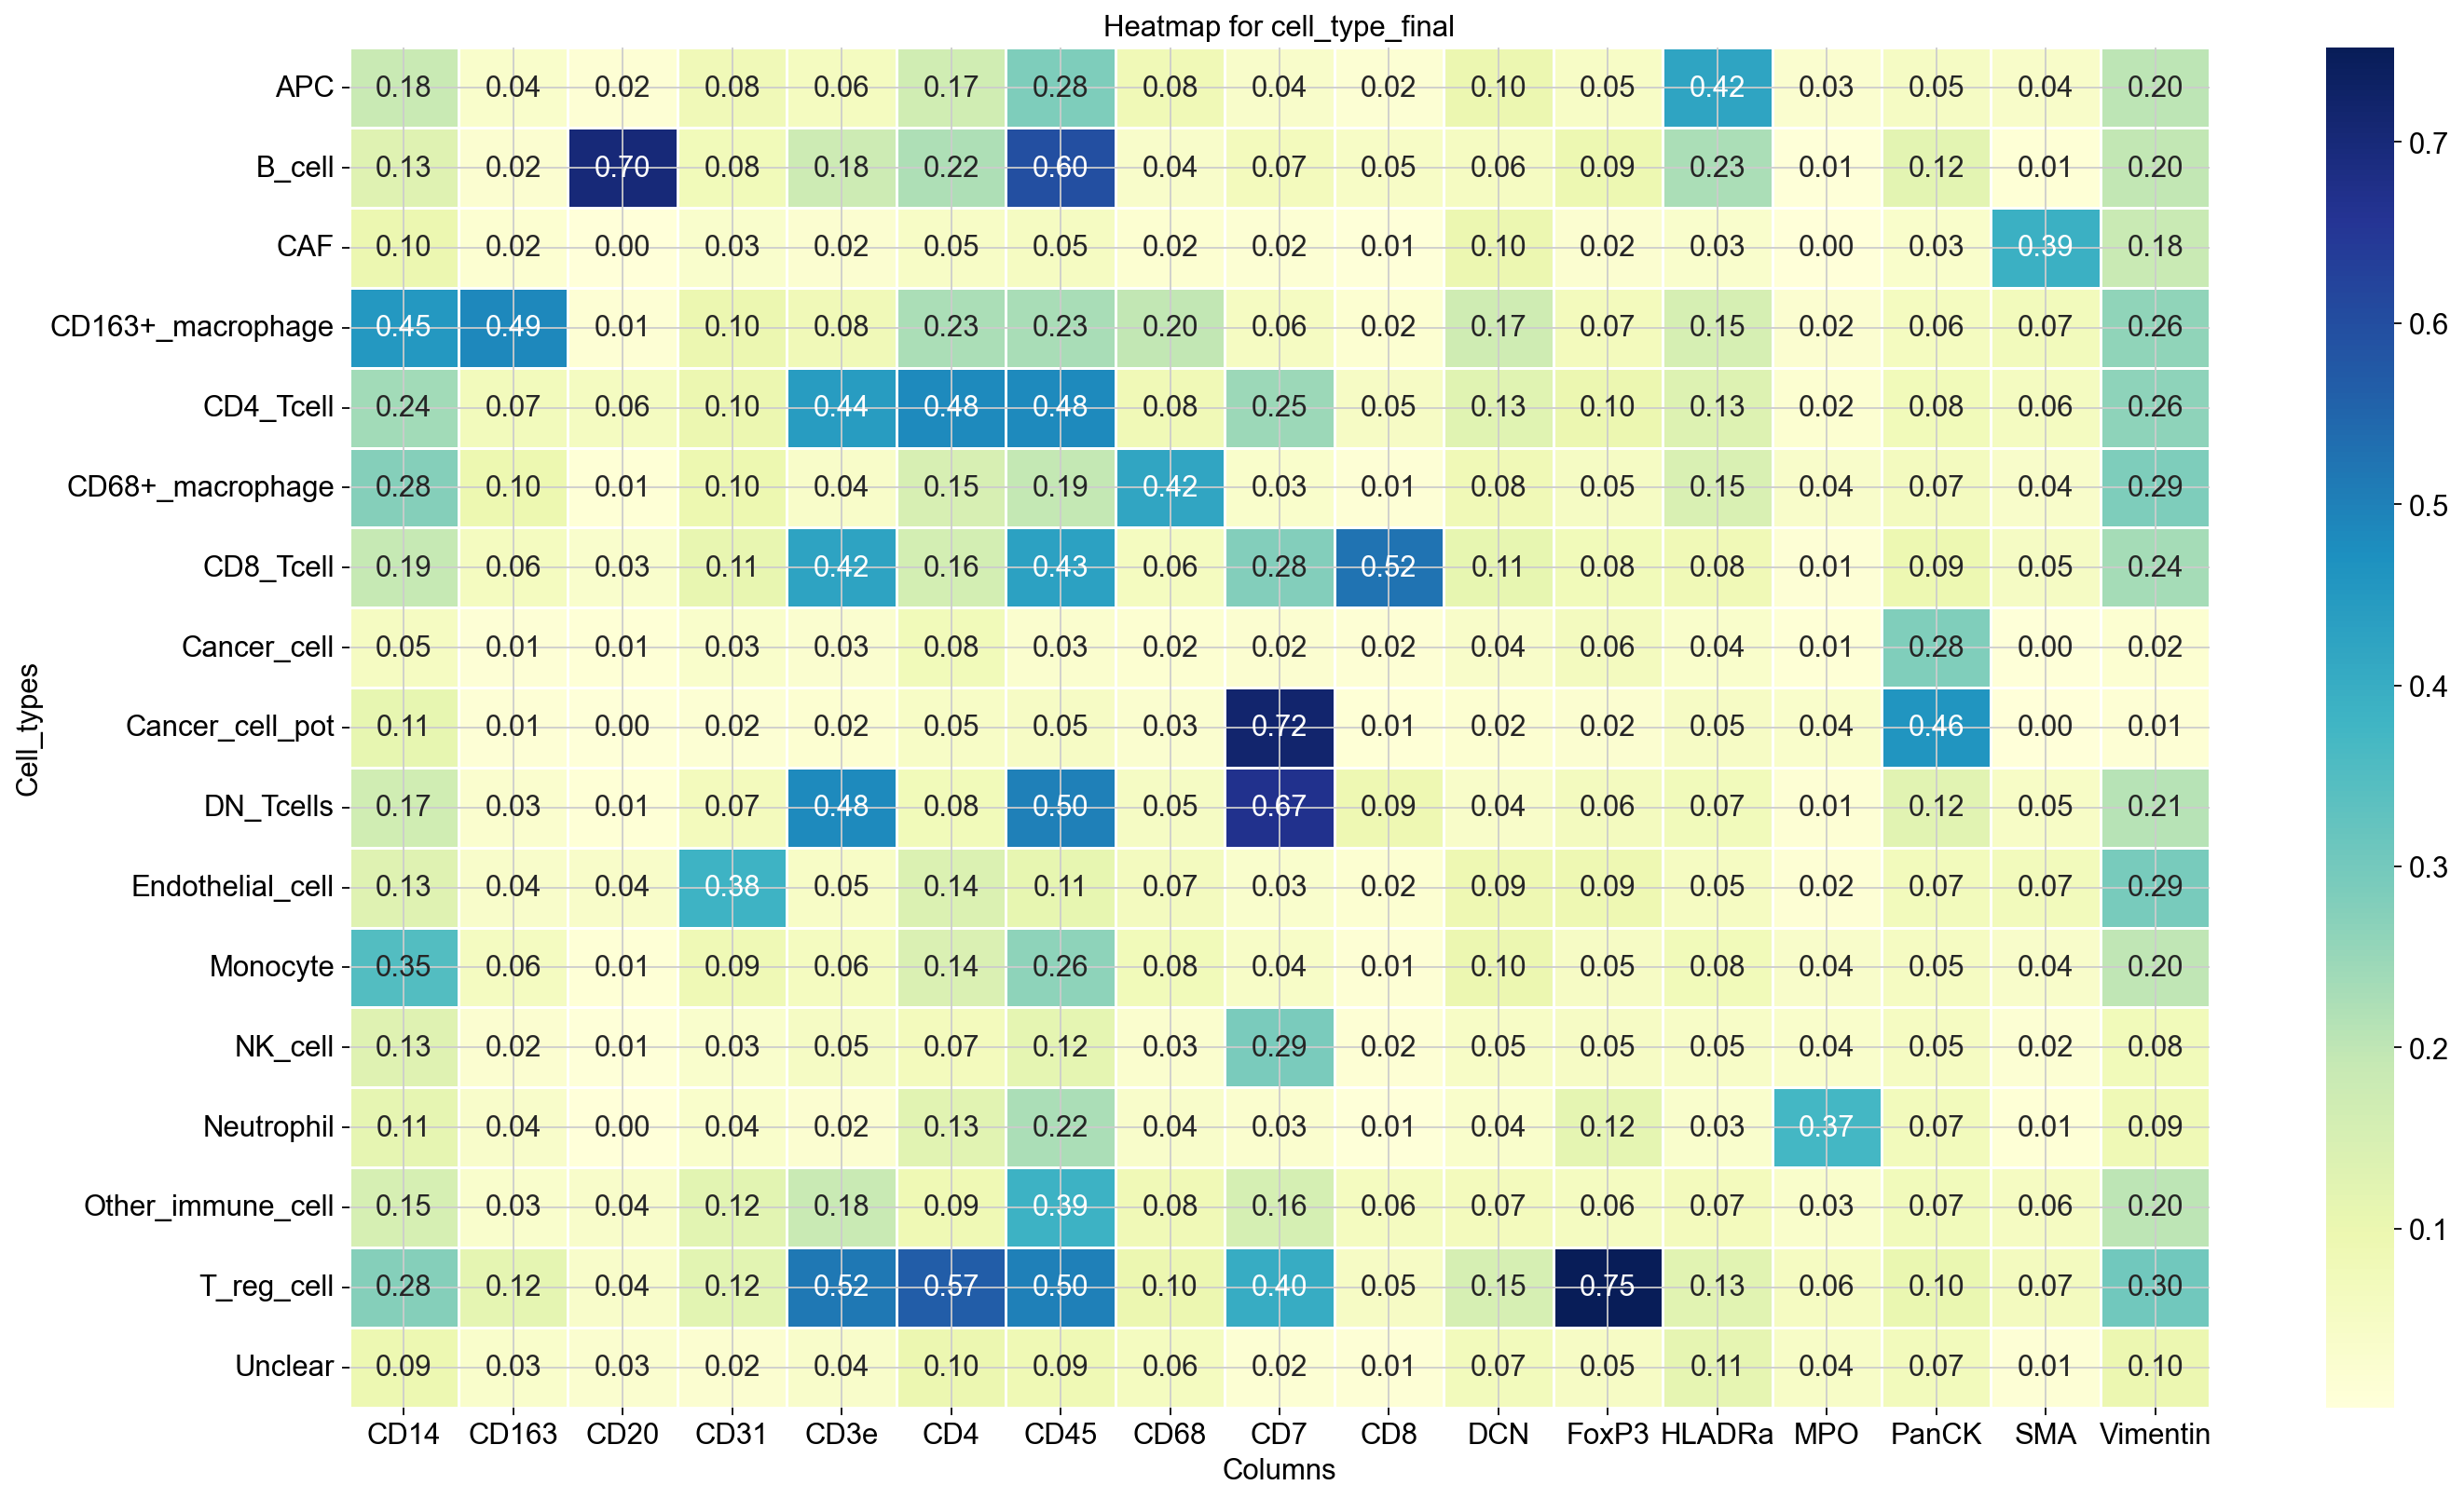

In [204]:
# Heatmap visualisation
# Specify the columns for the heatmap
columns_for_heatmap = ['SMA','CD4','FoxP3','CD31','CD7', 'CD163', 'DCN',
       'CD68','CD8', 'CD3e', 'MPO', 'CD20', 'HLADRa', 'CD14', 'CD45', 'PanCK', 'Vimentin'] # Replace with your actual column names

# Create a pivot table to prepare data for the heatmap
heatmap_data = df.pivot_table(index='cell_type_final', values=columns_for_heatmap)

# Create a heatmap using seaborn
plt.figure(figsize=(20, 12))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
plt.title("Heatmap for cell_type_final")
plt.xlabel("Columns")
plt.ylabel("Cell_types")
plt.show()

In [209]:
#Saving the table
save_path = "/Volumes/VERBATIM HD 1/Hamburg Project/preprocessing_figures/cell_table_with_annotation_TG/cell_table_with_annotation_final.csv"
df.to_csv(save_path, index=True
          )

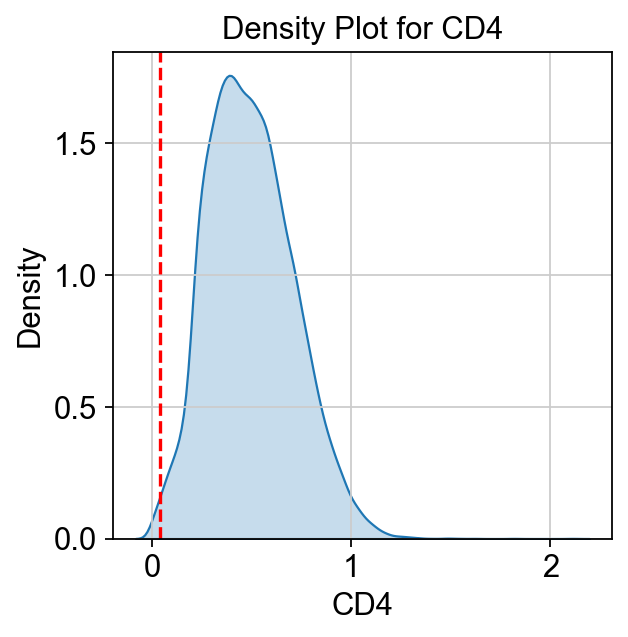

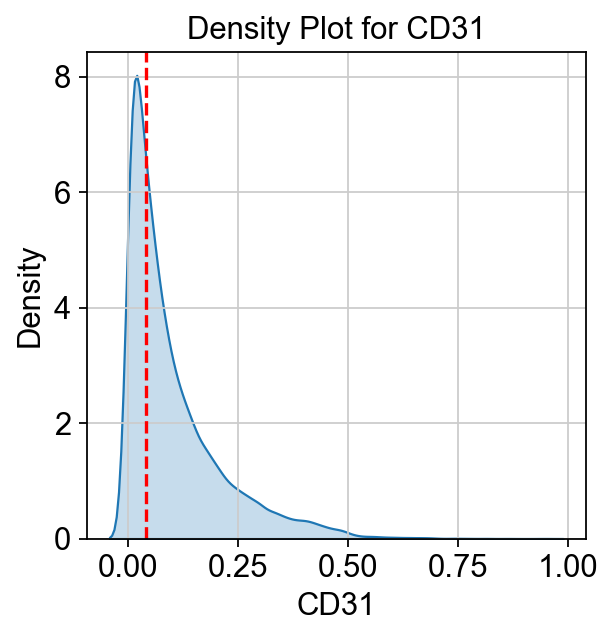

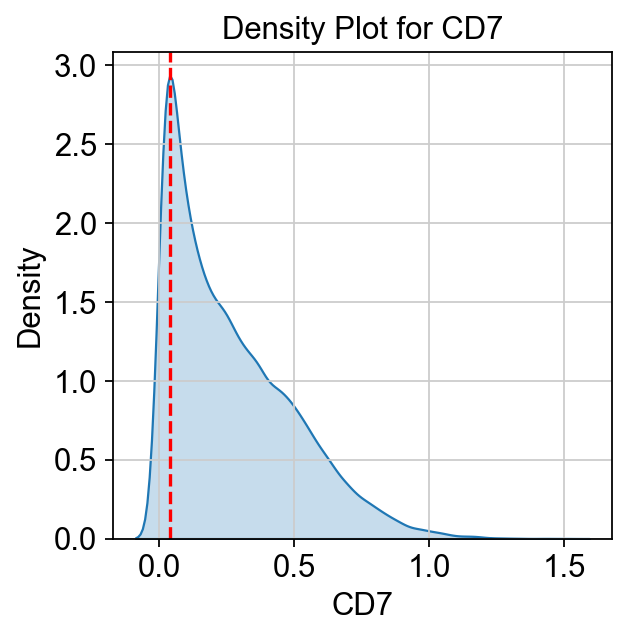

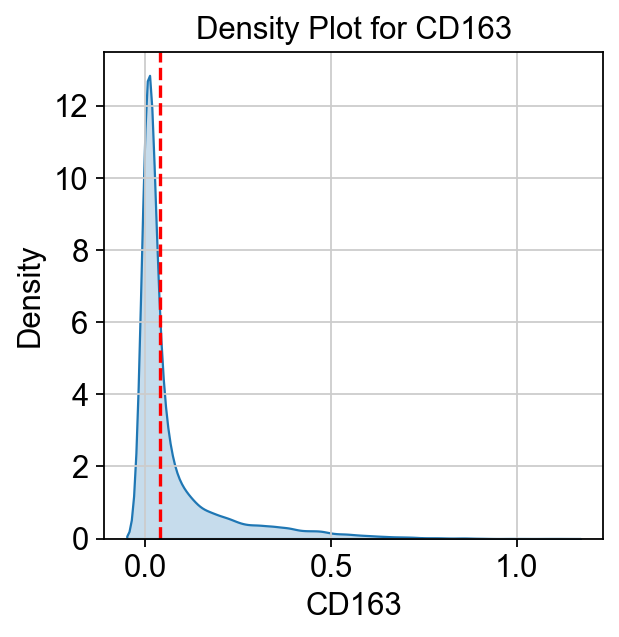

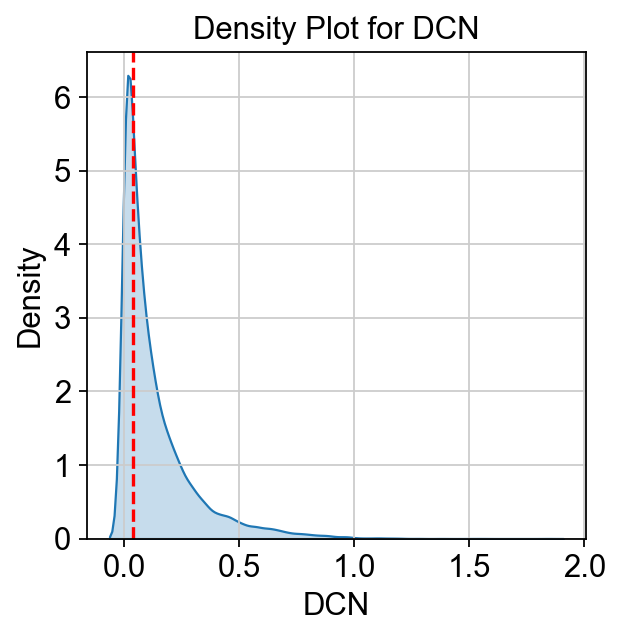

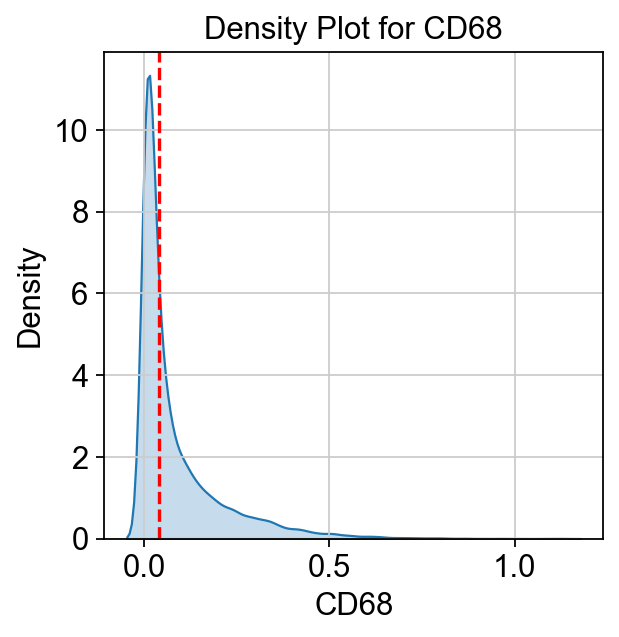

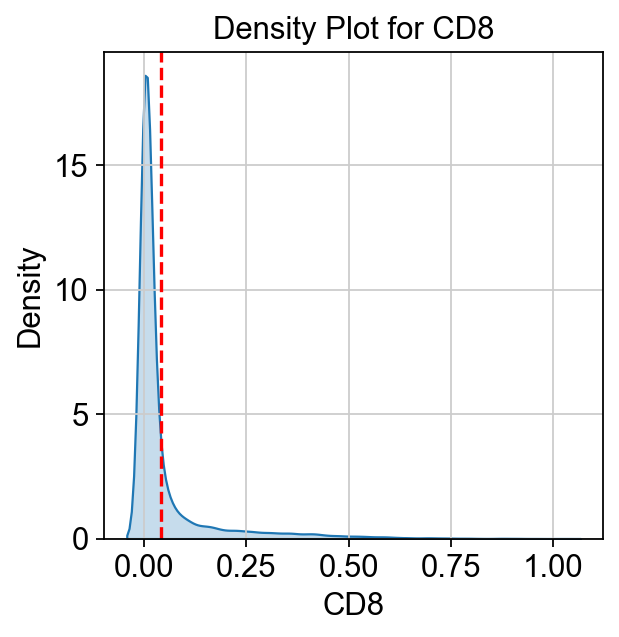

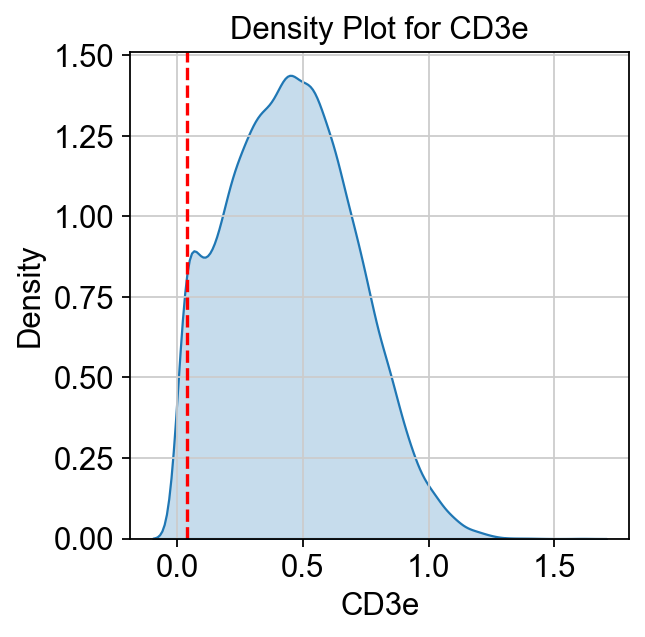

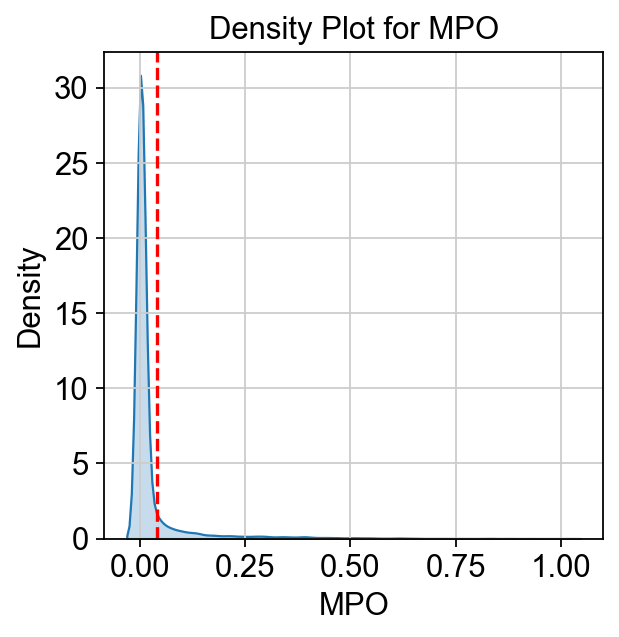

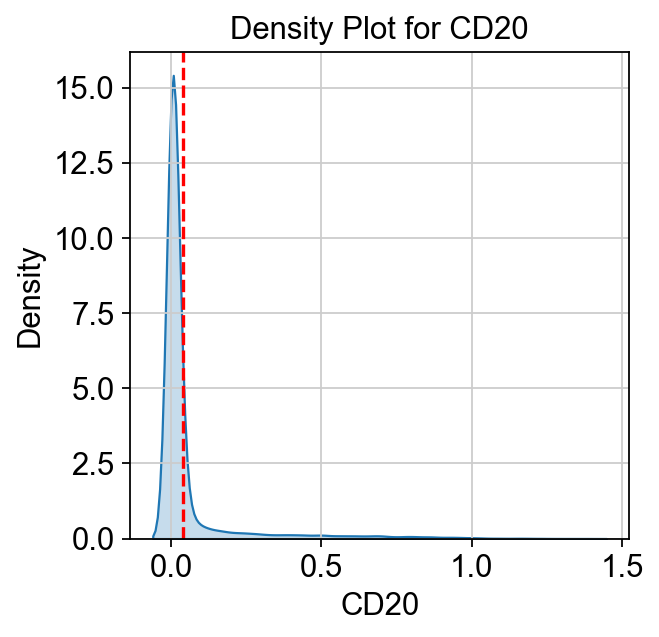

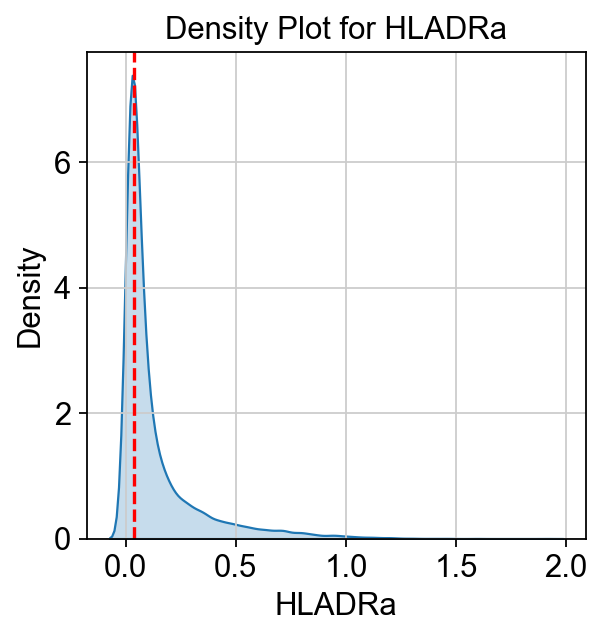

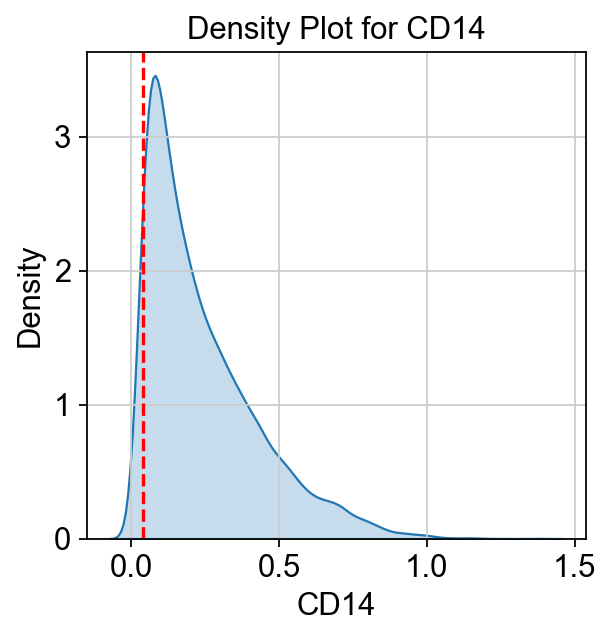

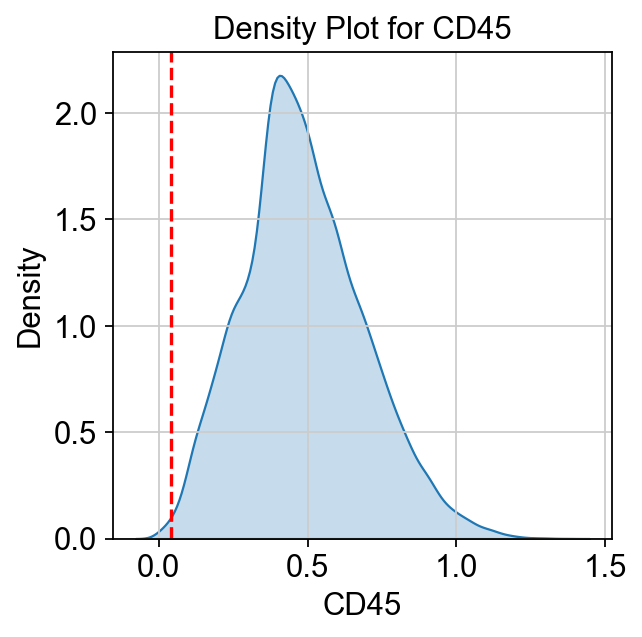

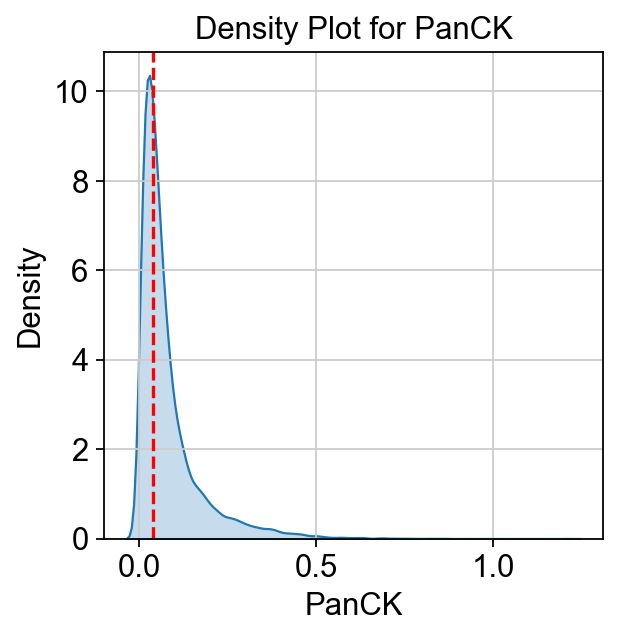

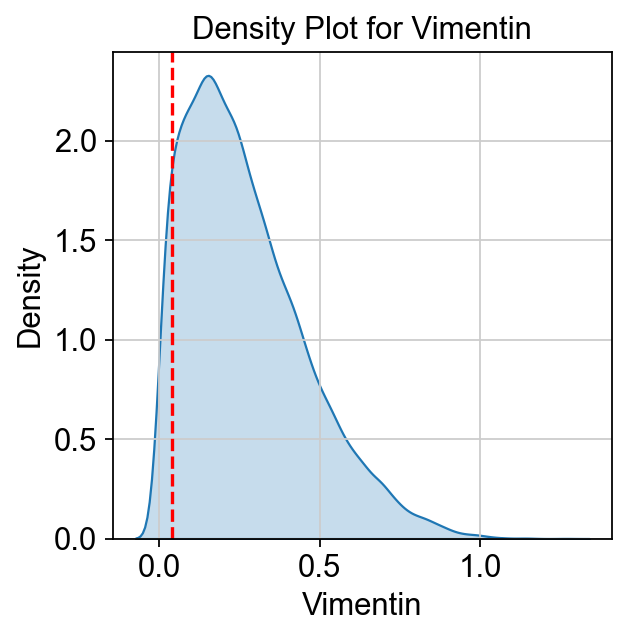

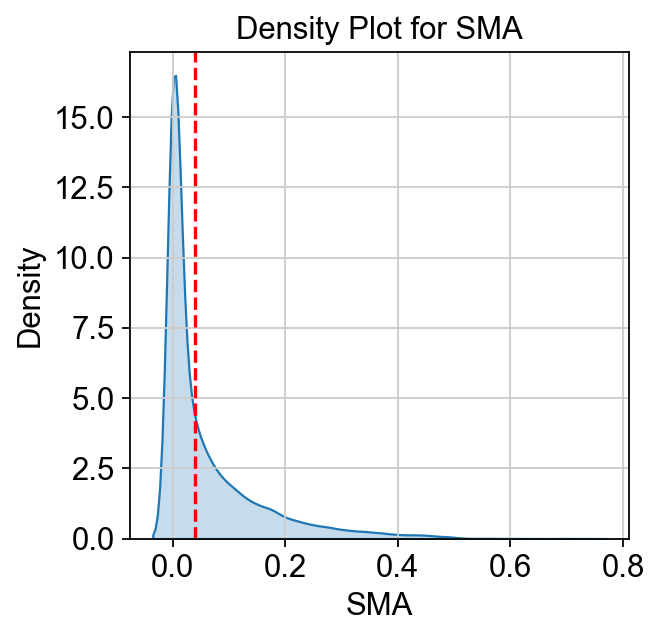

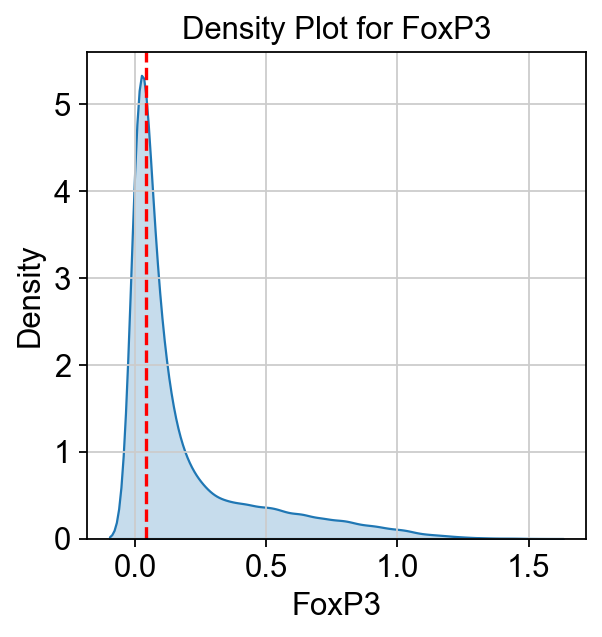

In [202]:
# List of columns for which you want to generate density plots
columns_to_plot = ['CD4','CD31','CD7', 'CD163', 'DCN',
       'CD68','CD8', 'CD3e', 'MPO', 'CD20', 'HLADRa', 'CD14', 'CD45', 'PanCK', 'Vimentin', 'SMA', 'FoxP3'] # Add more columns as needed

# Filter the DataFrame to get rows where 'cell_type' is 'Cancer_cell_pot'
subset_df = df[df['cell_type_final'] == 'CD4_Tcell']

# Iterate over each column and generate density plot
for column in columns_to_plot:
    plt.figure()  # Create a new figure for each plot
    sns.kdeplot(data=subset_df[column], shade=True)
    
    # Add a vertical line at a certain value on the x-axis
    # Change 'line_value' to the desired value where you want the line
    line_value = 0.04  # Adjust this value as needed
    plt.axvline(x=line_value, color='red', linestyle='--')
    
    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Density Plot for {column}')
    
    # Show the plot
    plt.show()


In [203]:
# Identify rows where cell_type is CD206 and CD206.tiff is below 0.2
mask = (df['cell_type_final'] == 'CD4_Tcell') & (df['FoxP3'] > 0.5)

# Replace the label with "PanCK_potentially" for rows matching the condition
df.loc[mask, 'cell_type_final'] = 'T_reg_cell'

In [101]:
# Identify rows where cell_type is CD206 and CD206.tiff is below 0.2
mask = (df['cell_type_final'] == 'Unclear') & (df['CD31'] > 0.1)

# Replace the label with "PanCK_potentially" for rows matching the condition
df.loc[mask, 'cell_type_final'] = 'Endothelial_cell'

In [122]:
# Identify rows where cell_type is CD206 and CD206.tiff is below 0.2
mask = (df['cell_type_final'] == 'Immune_cell') & (df['CD14'] > 0.4)

# Replace the label with "PanCK_potentially" for rows matching the condition
df.loc[mask, 'cell_type_final'] = 'Monocyte'

In [94]:
# Identify rows where cell_type is CD206 and CD206.tiff is below 0.2
mask = (df['cell_type_final'] == 'Unclear') & (df['CD45'] > 0.35)

# Replace the label with "PanCK_potentially" for rows matching the condition
df.loc[mask, 'cell_type_final'] = 'Immune_cell'

In [383]:
# Identify rows where cell_type is CD206 and CD206.tiff is below 0.2
mask = (df['cell_type_final'] == 'Monocyte') & (df['CD163'] > 0.15)

# Replace the label with "PanCK_potentially" for rows matching the condition
df.loc[mask, 'cell_type_final'] = 'CD163+_macrophage'

In [392]:
# Identify rows where cell_type is CD206 and CD206.tiff is below 0.2
mask = (df['cell_type_final'] == 'CD163+_macrophage') & (df['CD68'] > 0.35)

# Replace the label with "PanCK_potentially" for rows matching the condition
df.loc[mask, 'cell_type_final'] = 'CD68+CD163+_macrophage'

In [386]:
# Identify rows where cell_type is CD206 and CD206.tiff is below 0.2
mask = (df['cell_type_final'] == 'Monocyte') & (df['MPO'] > 0.1)

# Replace the label with "PanCK_potentially" for rows matching the condition
df.loc[mask, 'cell_type_final'] = 'Neutrophil'

In [412]:
# Identify rows where cell_type is CD206 and CD206.tiff is below 0.2
mask = (df['cell_type_final'] == 'NK_cell') & (df['PanCK'] > 0.07)

# Replace the label with "PanCK_potentially" for rows matching the condition
df.loc[mask, 'cell_type_final'] = 'Cancer_cell'

In [234]:
# Identify rows where cell_type is CD206 and CD206.tiff is below 0.2
mask = (df['cell_type_final'] == 'Unclear') & (df['CD163'] > 0.5)

# Replace the label with "PanCK_potentially" for rows matching the condition
df.loc[mask, 'cell_type_final'] = 'CD163+_macrophage'

In [235]:
# Identify rows where cell_type is CD206 and CD206.tiff is below 0.2
mask = (df['cell_type_final'] == 'Unclear') & (df['MPO'] > 0.25)

# Replace the label with "PanCK_potentially" for rows matching the condition
df.loc[mask, 'cell_type_final'] = 'Neutrophil'

In [254]:
# Identify rows where cell_type is CD206 and CD206.tiff is below 0.2
mask = (df['cell_type_final'] == 'Unclear') & (df['CD14'] > 0.16)

# Replace the label with "PanCK_potentially" for rows matching the condition
df.loc[mask, 'cell_type_final'] = 'Monocyte'

In [289]:
# Identify rows where cell_type is CD206 and CD206.tiff is below 0.2
mask = (df['cell_type_final'] == 'Unclear') & (df['CD4'] > 0.1)

# Replace the label with "PanCK_potentially" for rows matching the condition
df.loc[mask, 'cell_type_final'] = 'CD4_Tcell'

In [297]:
# Identify rows where cell_type is CD206 and CD206.tiff is below 0.2
mask = (df['cell_type_final'] == 'Unclear') & (df['CD7'] > 0.1)

# Replace the label with "PanCK_potentially" for rows matching the condition
df.loc[mask, 'cell_type_final'] = 'CD7_Tcell'

In [326]:
# Identify rows where cell_type is CD206 and CD206.tiff is below 0.2
mask = (df['cell_type_final'] == 'B_cell') & (df['CD3e'] > 0.3)

# Replace the label with "PanCK_potentially" for rows matching the condition
df.loc[mask, 'cell_type_final'] = 'Unclear'

In [319]:
# Identify rows where cell_type is CD206 and CD206.tiff is below 0.2
mask = (df['cell_type_final'] == 'CD4_Tcell') & (df['FoxP3'] > 0.4)

# Replace the label with "PanCK_potentially" for rows matching the condition
df.loc[mask, 'cell_type_final'] = 'Treg_cell'

In [398]:
# Identify rows where cell_type is CD206 and CD206.tiff is below 0.2
mask = (df['cell_type_final'] == 'APC') & (df['CD14.tiff'] < 0.2)

# Replace the label with "PanCK_potentially" for rows matching the condition
df.loc[mask, 'cell_type_final'] = 'B_cell'

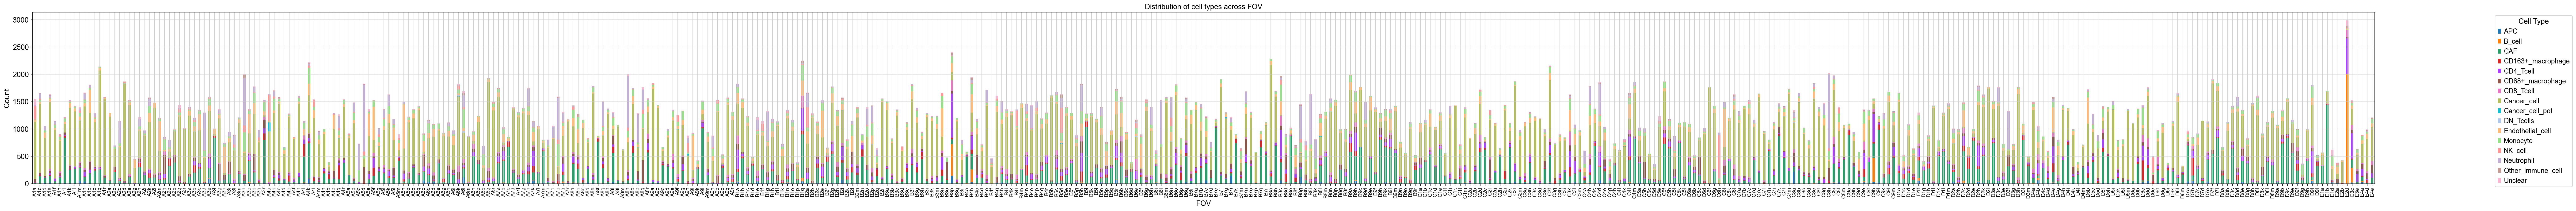

In [196]:
# Stacked bar plot of all cell types across FOVs

# Create a pivot table to count the occurrences of each cell type for each FOV
pivot_df = df.pivot_table(index='fov', columns='cell_type_final', aggfunc='size', fill_value=0)

# Plotting the stacked bar plot
pivot_df.plot(kind='bar', stacked=True, figsize=(80, 6))
plt.title('Distribution of cell types across FOV')
plt.xlabel('FOV')
plt.ylabel('Count')
plt.xticks(fontsize=10)  # Adjust font size of x-axis labels
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

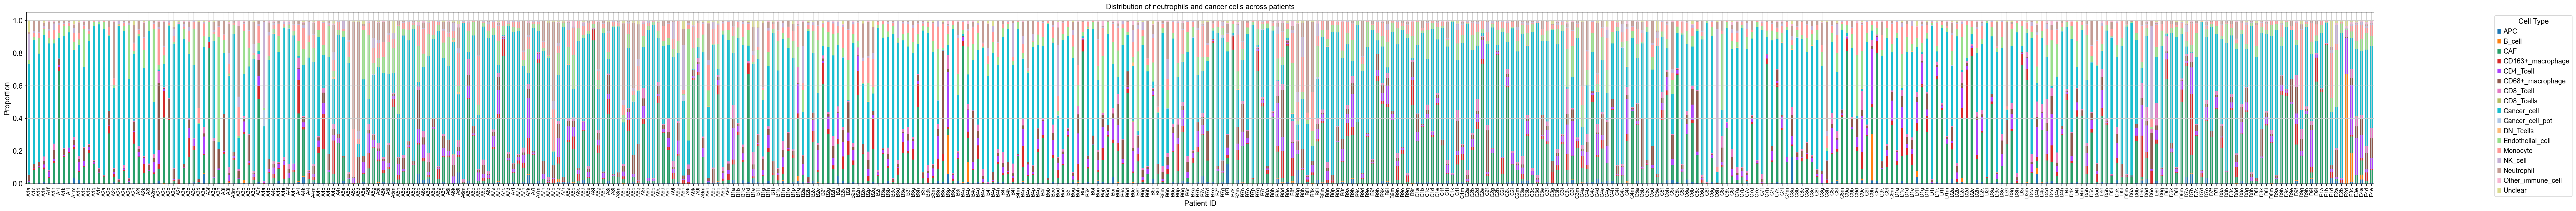

In [185]:
pivot_df_prop = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Plotting the stacked bar plot with proportions
pivot_df_prop.plot(kind='bar', stacked=True, figsize=(80, 6))
plt.title('Distribution of neutrophils and cancer cells across patients')
plt.xlabel('Patient ID')
plt.ylabel('Proportion')
plt.xticks(fontsize=10)  # Adjust font size of x-axis labels
plt.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
